## 6.5 Unsupervised Machine Learning - Clustering

### This script contains the following:

#### 1. Importing libraries and data 
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
path = r'/Users/a/Career Foundry/Achievement 6/02 Data/02 Prepared Data'

In [4]:
path

'/Users/a/Career Foundry/Achievement 6/02 Data/02 Prepared Data'

In [5]:
# Importing dataset
df = pd.read_csv(os.path.join(path, 'df_cleaned.csv'), index_col = False)

In [6]:
df.head()

,Unnamed: 0,Region,Country,City,Month,Day,Year,AvgTemperature
0,0,Africa,Algeria,Algiers,1,1,1995,64.2
1,1,Africa,Algeria,Algiers,1,2,1995,49.4
2,2,Africa,Algeria,Algiers,1,3,1995,48.8
3,3,Africa,Algeria,Algiers,1,4,1995,46.4
4,4,Africa,Algeria,Algiers,1,5,1995,47.9


In [7]:
# Creating a subset with only the variables we want to display in the map
df_2 = df[['Year','AvgTemperature']]
df_2.head()

,Year,AvgTemperature
0,1995,64.2
1,1995,49.4
2,1995,48.8
3,1995,46.4
4,1995,47.9


### 2. The elbow technique

In [8]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [10]:
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] 

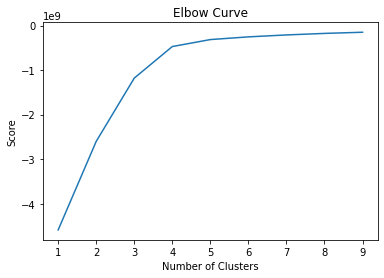

In [11]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal number of clusters is 3

### 3. k-means clustering


In [12]:
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 



In [13]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

/Users/a/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [14]:
df['clusters'] = kmeans.fit_predict(df_2)

/Users/a/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [15]:
df.head()

,Unnamed: 0,Region,Country,City,Month,Day,Year,AvgTemperature,clusters
0,0,Africa,Algeria,Algiers,1,1,1995,64.2,0
1,1,Africa,Algeria,Algiers,1,2,1995,49.4,0
2,2,Africa,Algeria,Algiers,1,3,1995,48.8,0
3,3,Africa,Algeria,Algiers,1,4,1995,46.4,0
4,4,Africa,Algeria,Algiers,1,5,1995,47.9,0


In [16]:
# Checking amount of observations under clusters column
df['clusters'].value_counts()

0    2825502
1      80385
2        440
Name: clusters, dtype: int64

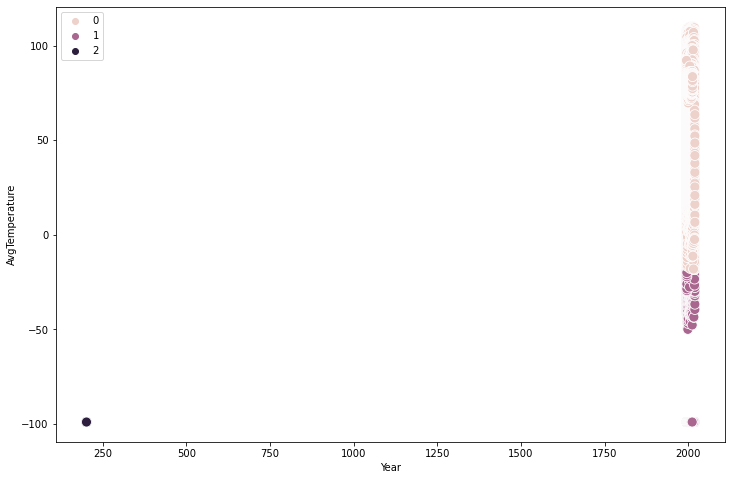

In [18]:
# Plot the clusters for the "Year" and "AvgTemperature" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Year'], y=df['AvgTemperature'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Year')
plt.ylabel('AvgTemperature') 
plt.show()

In [19]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [20]:
df.groupby('clusters').agg({'Year':['mean', 'median'], 
                         'AvgTemperature':['mean', 'median']})

Year         AvgTemperature       
                 mean  median           mean median
clusters                                           
0         2007.028343  2007.0      60.409023   63.3
1         2002.292691  2001.0     -97.949143  -99.0
2          200.797727   201.0     -99.000000  -99.0

The best cluster is the pink one, which has the best stats. The Average Temperature variable seems to have a relevance in this case and it´s the highest for the pink cluster